In [6]:
import numpy as np
import umap
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#UMAP_function

def plot_umap(umap_results, ax, **kwargs):

    plt.sca(ax)

    scatter_params = kwargs.get("scatter_params", {})
    scatter = ax.scatter(umap_results[:, 0], umap_results[:, 1], **scatter_params)

    if 'set_title' in kwargs.keys():
        ax.set_title(**kwargs['set_title'])
    
    if 'set_xlabel' in kwargs.keys():
        ax.set_xlabel(**kwargs['set_xlabel'])

    if 'set_xlim' in kwargs.keys():
        ax.set_xlim(**kwargs['set_xlim'])
        
    if 'set_xticks' in kwargs.keys():
        ax.set_xticks(**kwargs['set_xticks'])
        
    if 'tick_params' in kwargs.keys():
        ax.tick_params(**kwargs['tick_params'])

    
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    
    if kwargs.get('color_bar', False):
        colorbar_ax = plt.colorbar(scatter, ax=ax, format='{x:.1f}')
        vmin, vmax = np.min(colorbar_ax.get_ticks()), np.max(colorbar_ax.get_ticks())
        colorbar_ax.mappable.set_clim(vmin=vmin, vmax=vmax)
        colorbar_ax.set_ticks(ticks=[vmin, vmax], labels=['Low', 'High'], size=12)
        colorbar_ax.set_label(label='Feature value', size=16, labelpad=20, y=0.5)
        colorbar_ax.outline.set_visible(False)
        colorbar_ax.ax.tick_params(axis='both', top=False, right=False, bottom=False, left=False)


    

c:\Users\4019-tjyen\anaconda\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


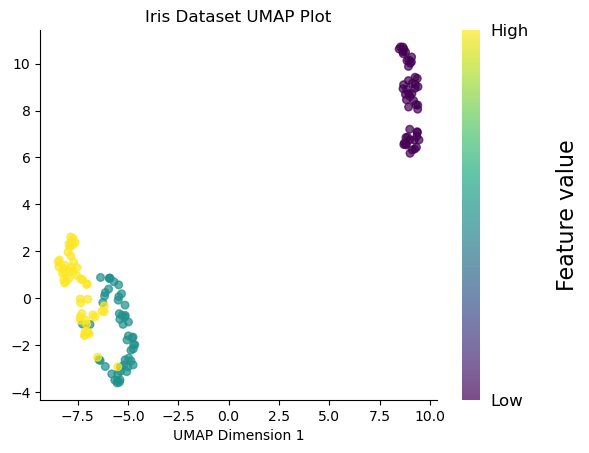

In [14]:
#function example
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

umap_model = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
umap_results = umap_model.fit_transform(X_scaled)

fig, ax = plt.subplots()
plot_umap(umap_results, ax, 
          scatter_params={'c': y, 'cmap': 'viridis', 's': 30, "alpha":0.7}, 
          set_title={'label': 'Iris Dataset UMAP Plot'}, 
          set_xlabel={'xlabel': 'UMAP Dimension 1'}, 
          color_bar=True)
plt.show()